# Pymaceuticals
analysis

In [85]:
#Import dependecies
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st
#load data into DF
mouseMetadata = pd.read_csv("data/Mouse_metadata.csv")
studyResults = pd.read_csv("data/Study_results.csv")


In [86]:
#merge data
data = studyResults.merge(mouseMetadata, on="Mouse ID", how="left")
data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [87]:
#chack number of mice
len(pd.unique(data["Mouse ID"]))

249

In [88]:
#check for duplicate mice ID
duplicates = data.duplicated(keep=False)
data[duplicates]

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.0,0,Propriva,Female,21,26
137,g989,0,45.0,0,Propriva,Female,21,26


In [89]:
#all data for duplicate mouse id
g989 = data[data["Mouse ID"] == "g989"]
g989

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [90]:
#drop duplicate mouse id
cleanData = data[data["Mouse ID"] != "g989"]
cleanData.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [91]:
#check number of mice after drop
len(pd.unique(cleanData["Mouse ID"]))

248

# Summary Statistics

In [92]:
#generate summary table
mean = cleanData.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].mean()
median = cleanData.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].median()
var = cleanData.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].var()
stdev = cleanData.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].std()
sem = cleanData.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].sem()

drugRegimen = pd.DataFrame({
    "Mean Tumor Volume": mean,
    "Median Tumor Volume": median,
    "Tumor Volume Variance": var,
    "Tumor Volume Std. Dev.": stdev,
    "Tumor Volume Std. Err.": sem
})
drugRegimen

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [93]:
#generate summary table alt method
cleanData.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].agg(['mean', 'median', 'var', 'std', 'sem'])

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


# Bar and Pie Charts

<Axes: xlabel='Drug Regimen', ylabel='# of Observed Mouse Timepoints'>

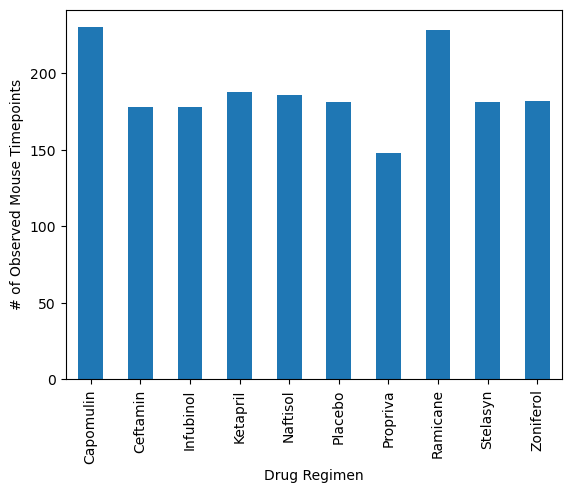

In [94]:
#generate bar chart using pandas
barData = cleanData.groupby(['Drug Regimen'])['Timepoint'].count()
barData.plot(kind='bar', ylabel='# of Observed Mouse Timepoints')

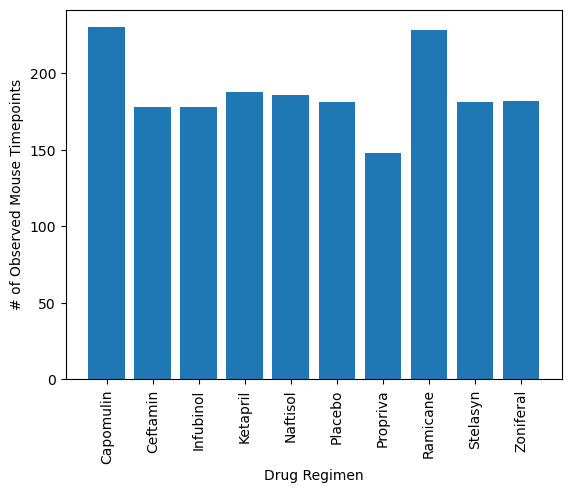

In [105]:
#generate bar chart using pyplot
x = ['Capomulin', 'Ceftamin', 'Infubinol', 'Ketapril', 'Naftisol', 
'Placebo', 'Propriva', 'Ramicane', 'Stelasyn', 'Zoniferal']
y = barData.tolist()
plt.bar(x, y)
plt.xticks(rotation=90)
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")
plt.show()


<Axes: ylabel='Sex'>

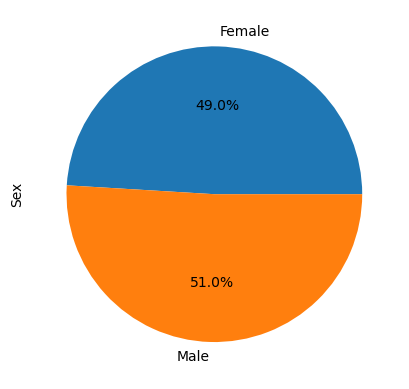

In [117]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
pieData = cleanData.groupby(['Sex'])['Sex'].count()
pieData.plot(kind='pie', autopct="%1.1f%%")

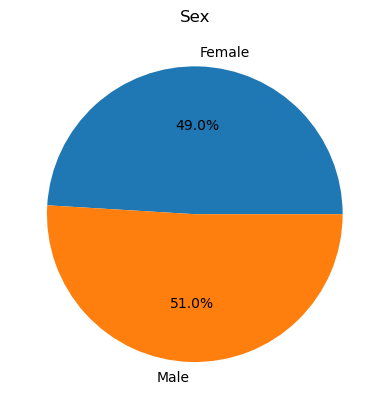

In [122]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = ['Female', 'Male']
sizes = pieData.tolist()
plt.pie(sizes, labels=labels, autopct="%1.1f%%")
plt.title('Sex')
plt.show()

# Quartiles, Outliers, and Boxplots

In [179]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
subset = (cleanData['Drug Regimen'] == 'Capomulin') | (cleanData['Drug Regimen'] == 'Ramicane') | (cleanData['Drug Regimen'] == 'Infubinol') |(cleanData['Drug Regimen'] == 'Ceftamin')
subsetDF = cleanData[subset]
# Start by getting the last (greatest) timepoint for each mouse
lastTimepoint = pd.DataFrame(subsetDF.groupby(['Mouse ID'], as_index=False)['Timepoint'].max())
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
maxTimeDF = subsetDF.merge(lastTimepoint, how='right', on=['Timepoint', 'Mouse ID'])

In [ ]:
# Put treatments into a list for for loop (and later for plot labels)
drugs = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumorVol = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes

    
    # add subset 

    
    # Determine outliers using upper and lower bounds


In [ ]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.

# Line and Scatter Plots

In [ ]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin

In [ ]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen


# Correlation and Regression

In [ ]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
